# Análisis de sentimiento

## Extración de un conjunto de tweets con localización USA
La razón por la cual se ha realizado este paso y no se ha obtado por utilizar el output.txt ofrecido es debido a que nos ofrece un número muy limitado de tweets disponibles.

In [ ]:
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
#Extración de datos 
consumer_key = "-"
consumer_secret = "-"
 
access_token  = "-"
access_token_secret  = '-'

#output =  open('/resources/outputUSA.txt', 'w')
output =  open('/resources/outputSpain.txt', 'w')
#This is a basic listener that just prints received tweets to stdout.
class StdOutListener(StreamListener):
    
    def on_data(self, data):
        #print(data)
        output.write(data)

        return True

    def on_error(self, status):
        print(status)

if __name__ == '__main__':

    #This handles Twitter authetification and the connection to Twitter Streaming API
    l = StdOutListener()
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    stream = Stream(auth, l)

    #This line filter tweets with geoposition .
    #USA
    #stream.filter(locations=[-124, 25, -66, 50])
    #Spain
    stream.filter(locations=[-38, 36.5, 3, 43.47])

KeyboardInterrupt: ignored

In [ ]:
import json
import csv
states = ["ak","al","ar","az","ca","co","ct","de","fl","ga","hi","ia","id","il",
          "in","ks","ky","la","ma","md","me","mi","mn","mo","ms","mt","nc","nd","ne","nh",
          "nj","nm","nv","ny","oh","ok","or","pa","ri","sc","sd","tn","tx","ut","va","vt",
          "wa","wi","wv","wy"]

states_names = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado',
'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois',
'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana',
'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC':'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island',
'SC': 'South Carolina', 'SD': 'South Dakota', 'TN':'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia',
'WA': 'Washington','WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'}


In [ ]:


def getState(data):
    if data["place"] != None and data["place"]["country_code"] == "US":
        state = str(data["place"]["full_name"]).lower().split(", ")
        if len(state) > 1:
            return state[1]

def isState(state):
    if state in states:
        return True
    return False 

def readTweets():
    file = "output.txt"
    array = []
    with open(file, "r") as ins:

        for line in ins:          
         if ( len(line)> 1): ## to avoid empty lines 
           data = json.loads(line)
           if "created_at" in data:
               state = getState(data)
               if isState(state):
                 if "text" in data:
                    print (data["text"])
                    print (state)
                    
def readTweet(line):         
         if ( len(line)> 1): ## to avoid empty lines 
           data = json.loads(line)
           if "created_at" in data:
               state = getState(data)
               if isState(state):
                  if isState(state) and "text" in data:
                    return ([state.upper(), data["text"]])
    

In [ ]:
readTweets()


il If you're a #Retail professional in #Marion, IL, check out this #job: http://t.co/MpE2pkVmz5 #Diversity #Veterans http://t.co/jzfiKfg3ZA


['il',
 "If you're a #Retail professional in #Marion, IL, check out this #job: http://t.co/MpE2pkVmz5 #Diversity #Veterans http://t.co/jzfiKfg3ZA"]

In [ ]:
#install & import the afinn library
!pip install afinn
#imports
import plotly.express as plot
from afinn import Afinn

afn = Afinn()
#file = "output.txt"
file = '/resources/outputUSA.txt'
states = ["ak","al","ar","az","ca","co","ct","de","fl","ga","hi","ia","id","il",
          "in","ks","ky","la","ma","md","me","mi","mn","mo","ms","mt","nc","nd","ne","nh",
          "nj","nm","nv","ny","oh","ok","or","pa","ri","sc","sd","tn","tx","ut","va","vt",
          "wa","wi","wv","wy"]

def sentimentalAnalysis(file):
  sentimentsTweets = dict()
  for state in states:
    sentimentsTweets[state.upper()] = [0.0]
  with open (file, "r") as output:
    for line in output:
      stateAndText = readTweet(line);
      if stateAndText is None:
        continue
      sentimentsTweets[stateAndText[0]].append(afn.score(stateAndText[1]))
      #print(sentimentsTweets)
# rellenar con ceros
  for clave in sentimentsTweets:
    valor = sentimentsTweets[clave]
    #print( valor)
    if len(valor) == 1:
      sentimentsTweets[clave] = valor[0]
    else:
      #delete first 
      valor.pop(0)
      mean =  sum(valor) / len(valor)
      sentimentsTweets[clave] = mean

    #print( sentimentsTweets[clave])
  return sentimentsTweets 
dic_states= sentimentalAnalysis(file) 

fig = plot.choropleth(locations=dic_states.keys(), color=dic_states, locationmode="USA-states", scope="usa", labels=dict(color="Mean Sentimental" ))
fig.show()

Resultados hallados con el output proporcionado: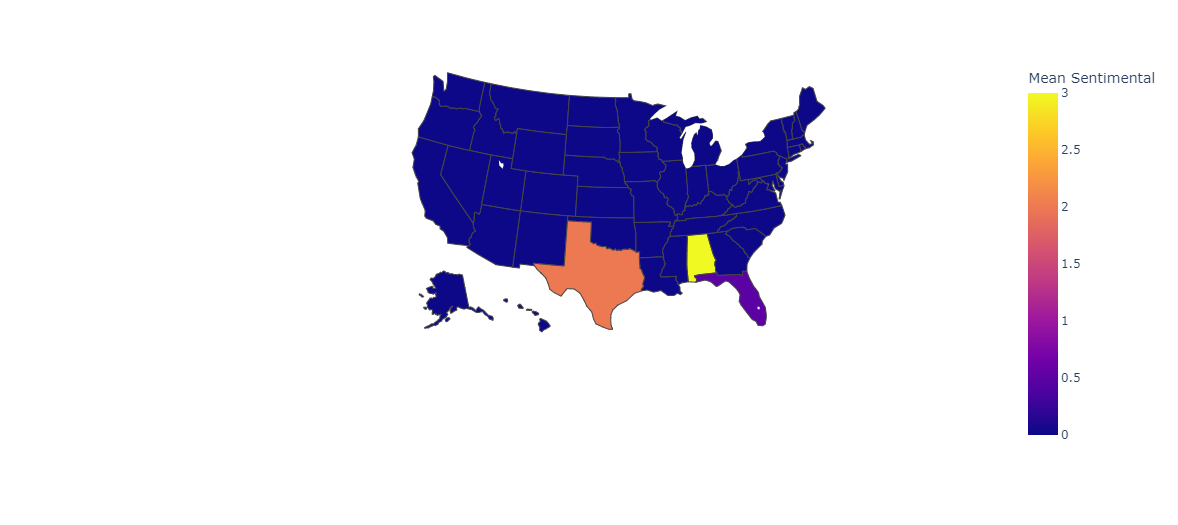

Resultados de una muestra hallada y almacenada en el archivo 'outputUSA.txt'
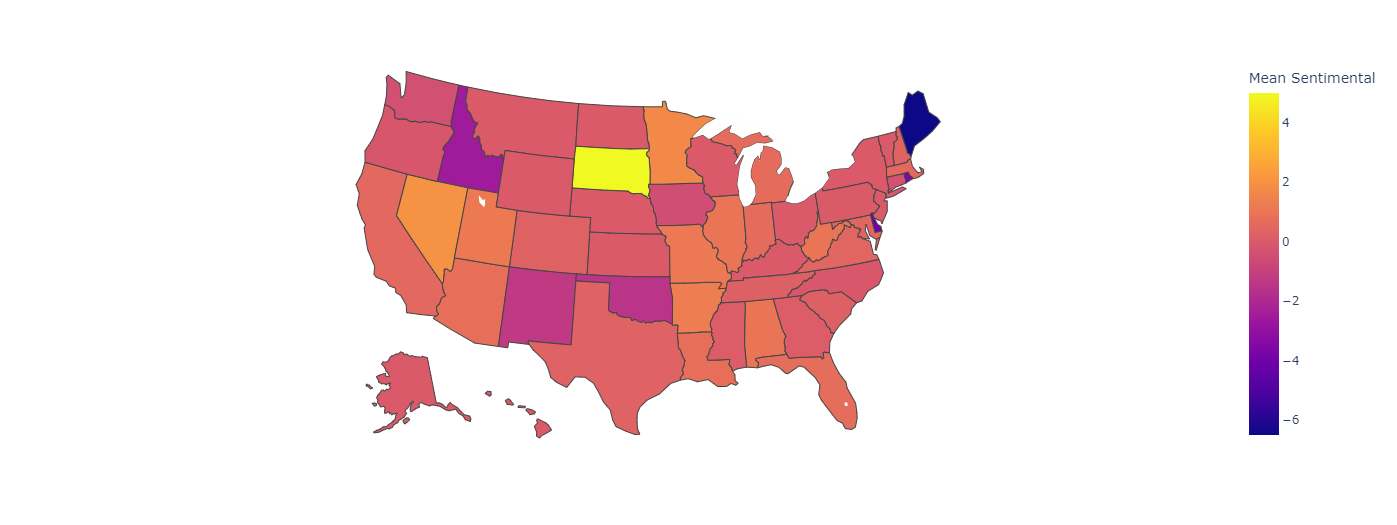

# Idiomas utilizados en España
Realizar un mapa de España que permita ver dónde se tuitea y en qué idioma se tuitea.

In [3]:
import json
import textblob

def readTweet(line):
  if (len(line)> 1):
    data = json.loads(line)
    if 'created_at' in data:
      if data["geo"] and data["geo"]["coordinates"] and "text" in data:
        return data
  return None

#file1 = '/resources/outputSpain.txt'
file1 = '/resources/outputSpain1.txt'
def langsInSpain(file1):
  langTweets = dict()
  with open(file1,"r") as fileTweets:
    for line in fileTweets:
      tweet = readTweet(line)
      if tweet is None:
        continue
      coordinates = tweet["geo"]["coordinates"]
      if tweet["lang"]:
        lang = tweet["lang"]
      else :
        lang = textblob.TextBlob(tweet["text"]).detect_language()

      if  langTweets.get(lang) is None:
         langTweets[lang] = []

      langTweets[lang].append(coordinates)
  return langTweets

  

In [5]:
positionLang = langsInSpain(file1)

In [11]:
import requests
import plotly.express as px
import plotly.graph_objs as pgo
import pandas as pd

# obtener los límites municipales de España
res = requests.get(
    "https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/spain-provinces.geojson"
)

# conseguir algunas ciudades en españa
df = (
    pd.json_normalize(
        requests.get(
            "https://opendata.arcgis.com/datasets/6996f03a1b364dbab4008d99380370ed_0.geojson"
        ).json()["features"]
    )
    .loc[
        lambda d: d["properties.CNTRY_NAME"].eq("Spain"),
        ["properties.CITY_NAME", "geometry.coordinates"],
    ]
    .assign(
        lon=lambda d: d["geometry.coordinates"].apply(lambda v: v[0]),
        lat=lambda d: d["geometry.coordinates"].apply(lambda v: v[1]),
    )
)

# dispersar las ciudades
fig2= px.scatter_mapbox(df, lat="lat", lon="lon", title = "Idiomas utilizados en tweets de España").update_layout(
    mapbox={
        "style": "carto-positron",
        "zoom": 3.5,
    },
)

for language in positionLang:
    latitudes = [coordinates[0] for coordinates in positionLang[language]]
    longitudes = [coordinates[1] for coordinates in positionLang[language]]

    fig2.add_trace(pgo.Scattermapbox(
        lat=latitudes,
        lon=longitudes,
        text = language,
        mode='markers',
       marker=pgo.scattermapbox.Marker(
            size=10,
        ),
        name = language))

fig2.show()


El resultado es el siguiente, con un número mayor de tweets podriamos ver más datos, pero mi máquina no puede almacenar tantos. Los puntos pequeños azules son las capitales de cada provincias (donde se situan)
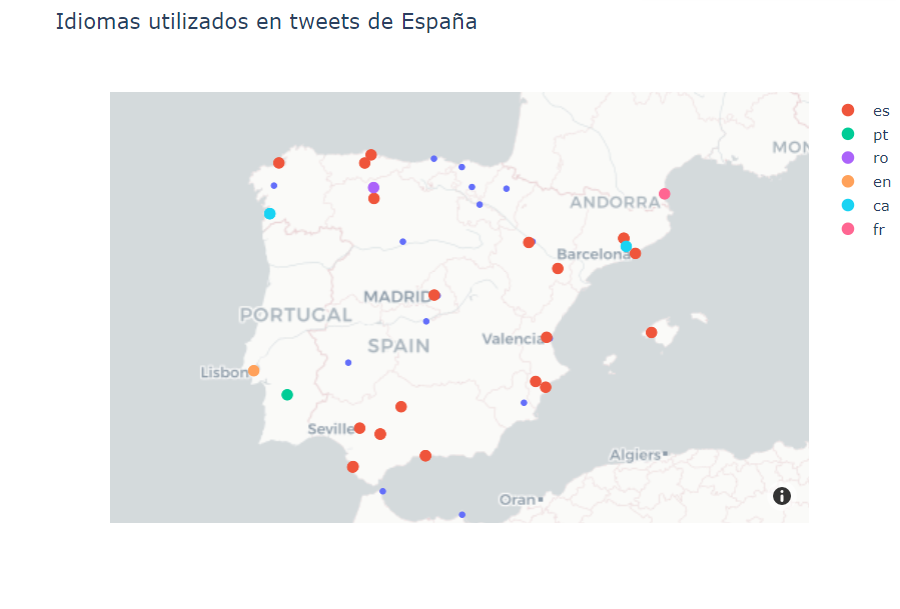

In [10]:
#Convert to html
%%shell
jupyter nbconvert --to html /ReadTweets.ipynb

[NbConvertApp] Converting notebook /ReadTweets.ipynb to html
[NbConvertApp] Writing 731706 bytes to /ReadTweets.html
